Data Preparation

In [1]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1gFz4Anh7AH9h_3TMMN4EU7E8vvq2jrkG' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet.csv')

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('tweet.csv')

print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1           1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2           2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3           3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4           4  negatif  Negara kita ngutang buat bngun infrastruktur y...


In [8]:
df.sample(10)

,Unnamed: 0,sentimen,tweet
1006,1006,netral,adakah yang punya tulisan dari media atau apap...
744,744,netral,Harga tas sama harga motor kok mahalan tas. ...
390,390,negatif,Pecatan gak ngerti ekonomi ðŸ˜‚ðŸ˜‚ðŸ˜‚ Ngerti...
974,974,negatif,pertumbuhan ekonomi di masa pak @jokowi masih ...
1433,1433,netral,Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...
1003,1003,positif,Semoga di periode kedua masa pemerintahan bapa...
244,244,netral,"Tax Ratio 10, xx % dan ada tax amnesty saja pa..."
265,265,netral,Jokowi dan Raja Salman Sepakat Tingkatkan Kerj...
592,592,negatif,Bagaimana mau lebih baik kalo hidup makin susa...
1178,1178,positif,THE GREAT CLOSING STATEMENT FROM THE NEXT INDO...


In [10]:
print("Number of tweets : {}", format(len(df)))

Number of tweets : {} 1815


In [11]:
tweet_id = 1810
tweet = df.iloc[tweet_id]

In [12]:
print("Tweet: {}".format(tweet["tweet"]))
print("Tweet sentiment: {}".format(tweet["sentimen"]))

Tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden
Tweet sentiment: netral


Dataset Visualization

In [13]:
import matplotlib.pyplot as plt

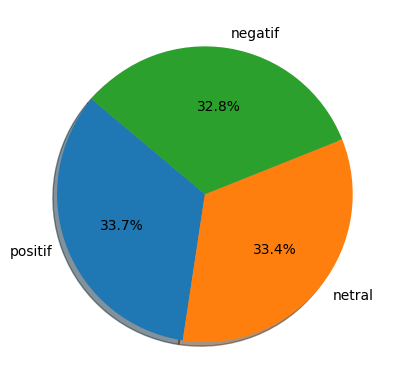

In [14]:
sentiment_count = df["sentimen"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [15]:
print("Number of + tweets: {}".format(df[df["sentimen"]=="positif"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentimen"]=="negatif"].count()[0]))
print("Number of = tweets: {}".format(df[df["sentimen"]=="netral"].count()[0]))

Number of + tweets: 612
Number of - tweets: 596
Number of = tweets: 607


<ipython-input-15-8775dc0bfcf1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of + tweets: {}".format(df[df["sentimen"]=="positif"].count()[0]))
<ipython-input-15-8775dc0bfcf1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of - tweets: {}".format(df[df["sentimen"]=="negatif"].count()[0]))
<ipython-input-15-8775dc0bfcf1>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of = tweets: {}".

In [16]:
from wordcloud import WordCloud

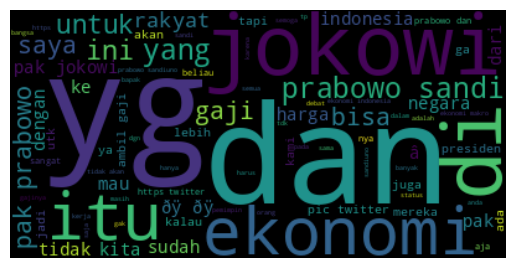

In [18]:
pos_tweets = df[df["sentimen"]=="positif"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

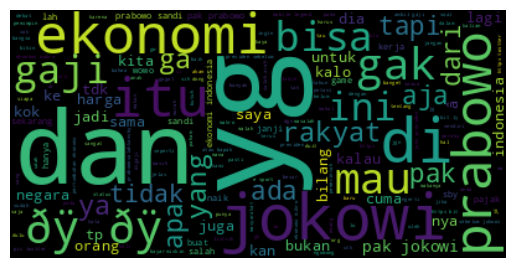

In [19]:
pos_tweets = df[df["sentimen"]=="negatif"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

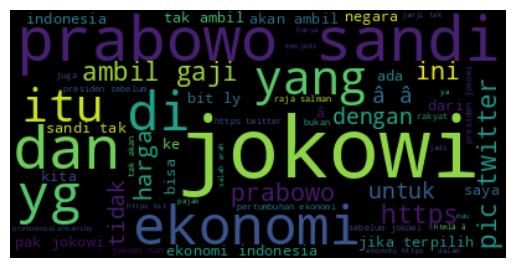

In [20]:
pos_tweets = df[df["sentimen"]=="netral"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Text** Normalization

In [21]:
#LOWERCASE

tweet_id = 1810
tweet = df.iloc[tweet_id]

def to_lowercase(tweet_text):
    tweet_text = tweet_text.lower()
    return tweet_text

tweet_text = tweet['tweet']
print("Original tweet: {}".format(tweet_text))
print("Processed tweet: {}".format(to_lowercase(tweet_text)))



Original tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden
Processed tweet: negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019gantipresiden


In [22]:
df['tweet'] = df['tweet'].apply(to_lowercase)


print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata @prabowo indonesia tidak dihargai bangsa ...
1           1   netral  batuan langka, tasbih jokowi hadiah dari habib...
2           2   netral  di era jokowi, ekonomi indonesia semakin baik....
3           3  positif  bagi sumatera selatan, asian games berdampak p...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [23]:
#WORDREPETITION
import re


def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

tweet_text = tweet['tweet']
print("Original tweet: {}".format(tweet_text))
print("Processed tweet: {}".format(word_repetition(tweet_text)))


Original tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden
Processed tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden


In [24]:
df['tweet'] = df['tweet'].apply(word_repetition)

print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata @prabowo indonesia tidak dihargai bangsa ...
1           1   netral  batuan langka, tasbih jokowi hadiah dari habib...
2           2   netral  di era jokowi, ekonomi indonesia semakin baik....
3           3  positif  bagi sumatera selatan, asian games berdampak p...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [25]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(\?\.\!])', default_replace, tweet)
    return tweet

tweet_text = tweet['tweet']
print("Original tweet: {}".format(tweet_text))
print("Processed tweet: {}".format(punct_repetition(tweet_text)))

Original tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden
Processed tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden


In [26]:
df['tweet'] = df['tweet'].apply(punct_repetition)

print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata @prabowo indonesia tidak dihargai bangsa ...
1           1   netral  batuan langka, tasbih jokowi hadiah dari habib...
2           2   netral  di era jokowi, ekonomi indonesia semakin baik....
3           3  positif  bagi sumatera selatan, asian games berdampak p...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [27]:
import re

def clean_text(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove special characters, numbers, punctuations
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Remove "RT" (retweet marker)
    tweet = re.sub(r'\bRT\b', '', tweet)
    # Remove emojis
    emoji_pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    # Remove extra whitespaces
    tweet = tweet.strip()
    return tweet

# Assuming 'tweet' is a Pandas Series or a dictionary-like object
tweet_text = tweet['tweet']
print("Original tweet: {}".format(tweet_text))
print("Processed tweet: {}".format(clean_text(tweet_text)))



Original tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat  #2019GantiPresiden
Processed tweet: Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat


In [28]:
df['tweet'] = df['tweet'].apply(clean_text)

print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif  kata  indonesia tidak dihargai bangsa asing  b...
1           1   netral  batuan langka tasbih jokowi hadiah dari habib ...
2           2   netral  di era jokowi ekonomi indonesia semakin baik  ...
3           3  positif  bagi sumatera selatan asian games berdampak pd...
4           4  negatif  negara kita ngutang buat bngun infrastruktur y...


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
  # get stopwords dictionary
  stop_words = set(stopwords.words('indonesian'))

  # case folding
  text_lowered = text.lower()

  # remove stopwords
  cleaned_text = ' '.join([word for word in text_lowered.split(' ') if word not in stop_words])
  return cleaned_text
tweet_id = 1810
tweet = df.iloc[tweet_id]
tweet_text = tweet['tweet']
print("Original tweet: {}".format(tweet_text))
print("Processed tweet: {}".format(remove_stopwords(tweet_text)))

Original tweet: negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat
Processed tweet: negarawan sejati sll bangga mengedepankan harga bangsanya yg berdaulat


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
df['tweet'] = df['tweet'].apply(remove_stopwords)

print(df.head())

   Unnamed: 0 sentimen                                              tweet
0           0  negatif   indonesia dihargai bangsa asing  berita  hoax...
1           1   netral  batuan langka tasbih jokowi hadiah habib luthf...
2           2   netral  era jokowi ekonomi indonesia    pictwittercomw...
3           3  positif  sumatera selatan asian games berdampak pd ekon...
4           4  negatif  negara ngutang bngun infrastruktur udah dipake...


In [31]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:

!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


factory = StemmerFactory()
stemmer = factory.create_stemmer()


tweet_id = 1810
tweet = df['tweet'].iloc[tweet_id]
stemmed_text = stemmer.stem(tweet)
print(stemmed_text)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00
negarawan sejati sll bangga depan harga bangsa yg daulat


In [ ]:
from nltk.tokenize import word_tokenize
def tweet_tokenization(text):
    tokens = nltk.tokenize.TweetTokenizer().tokenize(text)
    return tokens

In [ ]:
tweet_tokenized = tweet_tokenization(tweet)

display(tweet)
print(word_tokenize(tweet))
print(tweet_tokenized)

'negarawan sejati sll bangga mengedepankan harga bangsanya yg berdaulat'

['negarawan', 'sejati', 'sll', 'bangga', 'mengedepankan', 'harga', 'bangsanya', 'yg', 'berdaulat']
['negarawan', 'sejati', 'sll', 'bangga', 'mengedepankan', 'harga', 'bangsanya', 'yg', 'berdaulat']


In [ ]:
import nltk
nltk.download('punkt')


def tweet_tokenization(tweet):
    tokenizer = nltk.tokenize.TweetTokenizer()
    tokens = tokenizer.tokenize(tweet)
    return tokens
df['tokenized_tweet'] = df['tweet'].apply(tweet_tokenization)

display(df[['sentimen','tweet']])
display(df[['sentimen','tokenized_tweet']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentimen,tweet
0,negatif,indonesia dihargai bangsa asing berita hoax...
1,netral,batuan langka tasbih jokowi hadiah habib luthf...
2,netral,era jokowi ekonomi indonesia pictwittercomw...
3,positif,sumatera selatan asian games berdampak pd ekon...
4,negatif,negara ngutang bngun infrastruktur udah dipake...
...,...,...
1810,netral,negarawan sejati sll bangga mengedepankan harg...
1811,netral,hrs ceramah damai indonesiaku perekonomian me...
1812,netral,mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,bantu majukan perekonomian bangsa jokowi yuk


,sentimen,tokenized_tweet
0,negatif,"[indonesia, dihargai, bangsa, asing, berita, h..."
1,netral,"[batuan, langka, tasbih, jokowi, hadiah, habib..."
2,netral,"[era, jokowi, ekonomi, indonesia, pictwitterco..."
3,positif,"[sumatera, selatan, asian, games, berdampak, p..."
4,negatif,"[negara, ngutang, bngun, infrastruktur, udah, ..."
...,...,...
1810,netral,"[negarawan, sejati, sll, bangga, mengedepankan..."
1811,netral,"[hrs, ceramah, damai, indonesiaku, perekonomia..."
1812,netral,"[mari, bangun, bangsa, dgn, mendukung, perekon..."
1813,netral,"[bantu, majukan, perekonomian, bangsa, jokowi,..."


In [ ]:
df[['sentimen', 'tweet', 'tokenized_tweet']].to_csv('tokenized_tweets.csv', index=False)

print("Data exported to 'tokenized_tweets.csv'")

Data exported to 'tokenized_tweets.csv'


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

# Step 1: Preprocess the text for LSTM input
max_words = 5000
max_len = 100

# Step 1a: Tokenizing the text
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['tweet'])
X = tokenizer.texts_to_sequences(df['tweet'])

# Step 1b: Padding sequences
X = pad_sequences(X, maxlen=max_len)

# Step 1c: Encode the sentiment labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentimen'])

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Step 4: Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model and store the training history
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), verbose=2)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy * 100:.2f}%")

# Step 7: Make predictions and print classification report
y_pred_lstm = np.argmax(model.predict(X_test), axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm, target_names=["Negatif", "Netral", "Positif"]))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
46/46 - 15s - 326ms/step - accuracy: 0.4539 - loss: 1.0644 - val_accuracy: 0.4959 - val_loss: 1.0306
Epoch 2/5
46/46 - 9s - 194ms/step - accuracy: 0.6315 - loss: 0.8760 - val_accuracy: 0.5758 - val_loss: 0.9019
Epoch 3/5
46/46 - 12s - 260ms/step - accuracy: 0.8044 - loss: 0.5593 - val_accuracy: 0.6171 - val_loss: 0.9251
Epoch 4/5
46/46 - 24s - 520ms/step - accuracy: 0.8871 - loss: 0.3133 - val_accuracy: 0.5950 - val_loss: 0.9624
Epoch 5/5
46/46 - 17s - 373ms/step - accuracy: 0.9366 - loss: 0.2025 - val_accuracy: 0.6006 - val_loss: 1.1359
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6080 - loss: 1.0736
LSTM Accuracy: 60.06%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

     Negatif       0.64      0.57      0.61       115
      Netral       0.60      0.60      0.60       118
     Positif       0.57      0.62      0.60       130

    accuracy                           0.60       363
   macro 

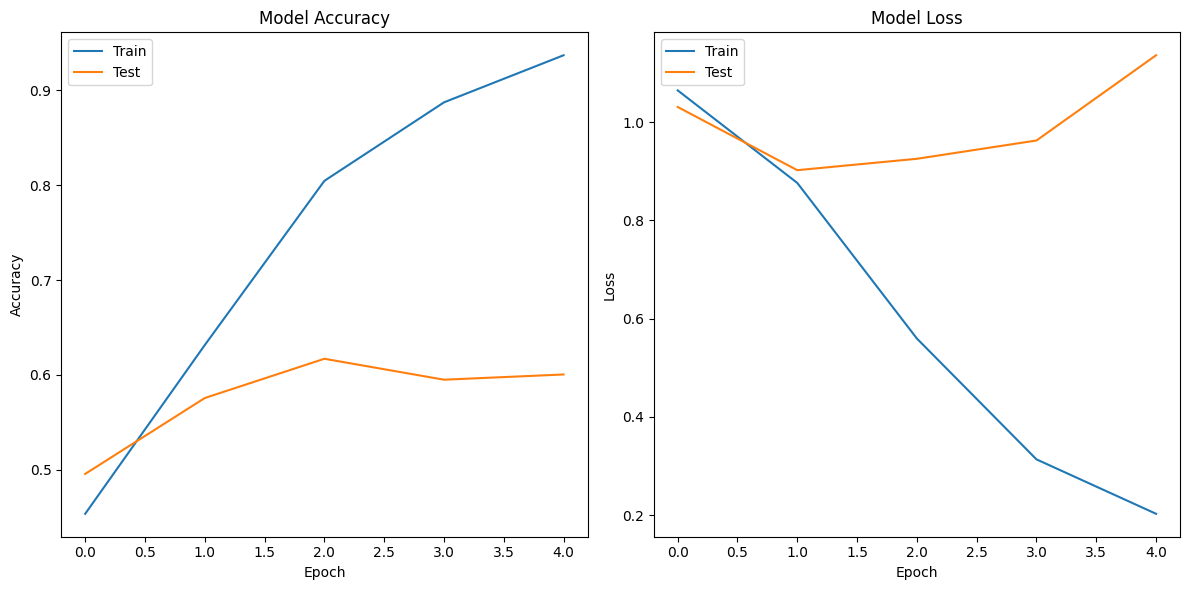

In [ ]:
# Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.57      0.61       115
     Neutral       0.60      0.60      0.60       118
    Positive       0.57      0.62      0.60       130

    accuracy                           0.60       363
   macro avg       0.60      0.60      0.60       363
weighted avg       0.60      0.60      0.60       363



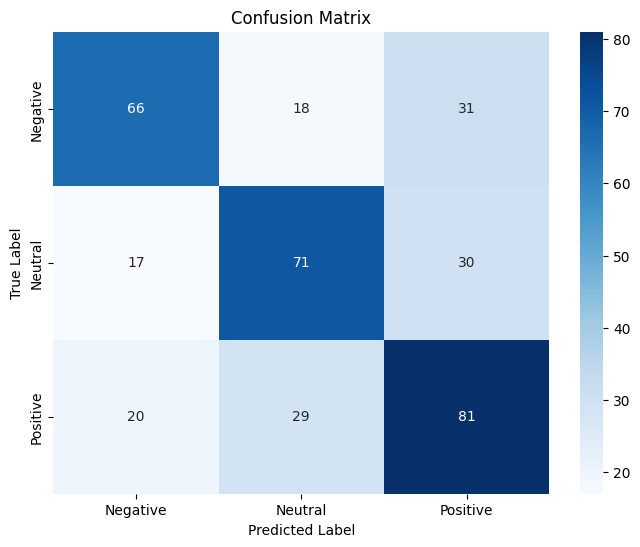

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Make predictions and print classification report
y_pred_lstm = np.argmax(model.predict(X_test), axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm, target_names=["Negative", "Neutral", "Positive"]))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Manually tuning hyperparameters by combining with the previous LSTM model

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df['tweet'] and df['sentimen'] are available from the dataset
# Step 1: Preprocess the text for LSTM input
max_words = 5000
max_len = 100

# Step 1a: Tokenizing the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['tweet'])
X = tokenizer.texts_to_sequences(df['tweet'])

# Step 1b: Padding sequences
X = pad_sequences(X, maxlen=max_len)

# Step 1c: Encode the sentiment labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentimen'])

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Manually tune hyperparameters
dropout_rates = [0.2, 0.3]
lstm_units = [64, 128]
batch_sizes = [32, 64]
epochs_list = [5, 10]
best_accuracy = 0
best_params = {}

for dropout_rate in dropout_rates:
    for lstm_unit in lstm_units:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                print(f"Training with dropout={dropout_rate}, lstm_units={lstm_unit}, batch_size={batch_size}, epochs={epochs}")

                model = Sequential()
                model.add(Embedding(max_words, 128, input_length=max_len))
                model.add(LSTM(lstm_unit, dropout=dropout_rate, recurrent_dropout=0.2))
                model.add(Dense(64, activation='relu'))  # Additional hidden layer
                model.add(Dropout(dropout_rate))  # Dropout layer to prevent overfitting
                model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes

                model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

                history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2)

                loss, accuracy = model.evaluate(X_test, y_test)
                print(f"Test accuracy: {accuracy * 100:.2f}%")

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'dropout_rate': dropout_rate,
                        'lstm_units': lstm_unit,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print(f"Best accuracy: {best_accuracy * 100:.2f}% with parameters: {best_params}")

# Step 4: Final predictions using the best model
y_pred_lstm = np.argmax(model.predict(X_test), axis=1)

# Step 5: Export predictions to CSV
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lstm,
    'Tweet': tokenized_tweet
})

# Save to CSV file
file_path = 'tweet_predictions_with_tuning.csv'
predictions_df.to_csv(file_path, index=False)

file_path


Training with dropout=0.2, lstm_units=64, batch_size=32, epochs=5
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 - 10s - 226ms/step - accuracy: 0.4318 - loss: 1.0727 - val_accuracy: 0.4270 - val_loss: 1.0469
Epoch 2/5
46/46 - 3s - 70ms/step - accuracy: 0.5427 - loss: 0.9644 - val_accuracy: 0.5427 - val_loss: 0.9537
Epoch 3/5
46/46 - 5s - 119ms/step - accuracy: 0.7521 - loss: 0.6654 - val_accuracy: 0.6143 - val_loss: 0.8774
Epoch 4/5
46/46 - 5s - 102ms/step - accuracy: 0.8726 - loss: 0.3600 - val_accuracy: 0.6116 - val_loss: 1.0462
Epoch 5/5
46/46 - 5s - 111ms/step - accuracy: 0.9394 - loss: 0.1882 - val_accuracy: 0.5950 - val_loss: 1.1479
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6192 - loss: 1.0935
Test accuracy: 59.50%
Training with dropout=0.2, lstm_units=64, batch_size=32, epochs=10
Epoch 1/10
46/46 - 7s - 146ms/step - accuracy: 0.4236 - loss: 1.0723 - val_accuracy: 0.4270 - val_loss: 1.0602
Epoch 2/10
46/46 - 3s - 67ms/step - accuracy: 0.5207 - loss: 0.9604 - val_accuracy: 0.5482 - val_loss: 0.9458
Epoch 3/10
46/46 - 7s - 144ms/step - accuracy: 0.7555 - loss: 0.6639 - val_a

NameError: name 'tokenized_tweet' is not defined

Epoch 1/5
46/46 - 27s - 578ms/step - accuracy: 0.4311 - loss: 1.0745 - val_accuracy: 0.4435 - val_loss: 1.0627
Epoch 2/5
46/46 - 20s - 440ms/step - accuracy: 0.5475 - loss: 0.9648 - val_accuracy: 0.5730 - val_loss: 0.9442
Epoch 3/5
46/46 - 12s - 272ms/step - accuracy: 0.7383 - loss: 0.6662 - val_accuracy: 0.5978 - val_loss: 0.9163
Epoch 4/5
46/46 - 8s - 168ms/step - accuracy: 0.8733 - loss: 0.3610 - val_accuracy: 0.6226 - val_loss: 1.0213
Epoch 5/5
46/46 - 9s - 206ms/step - accuracy: 0.9236 - loss: 0.2317 - val_accuracy: 0.6198 - val_loss: 1.0797
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6208 - loss: 1.0193
Test accuracy: 61.98%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

     Negatif       0.62      0.71      0.66       115
      Netral       0.63      0.62      0.62       118
     Positif       0.61      0.54      0.57       130

    accuracy                           0.62       363
   macro a

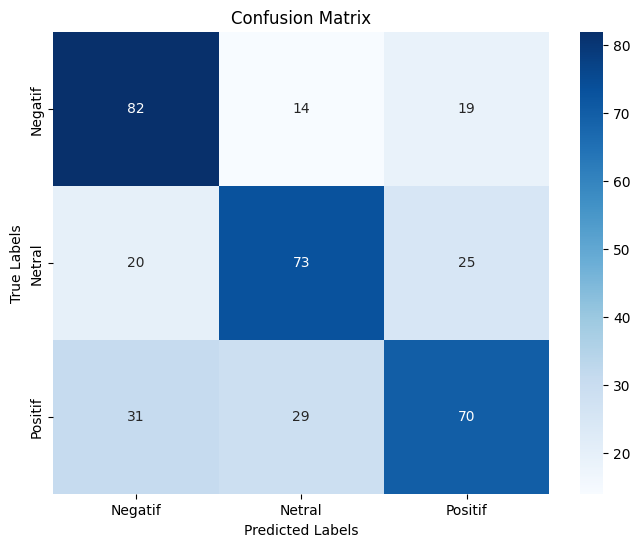

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Re-train the model with best parameters
best_dropout_rate = 0.3
best_lstm_units = 128
best_batch_size = 32
best_epochs = 5

# Build the model with best parameters
best_model = Sequential()
best_model.add(Embedding(max_words, 128, input_length=max_len))
best_model.add(LSTM(best_lstm_units, dropout=best_dropout_rate, recurrent_dropout=0.2))
best_model.add(Dense(64, activation='relu'))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(3, activation='softmax'))

# Compile the model
best_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Step 4: Final predictions using the best model
y_pred_lstm = np.argmax(best_model.predict(X_test), axis=1)

# Step 5: LSTM Classification Report
classification_rep = classification_report(y_test, y_pred_lstm, target_names=["Negatif", "Netral", "Positif"])
print("LSTM Classification Report:\n", classification_rep)

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lstm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Netral", "Positif"], yticklabels=["Negatif", "Netral", "Positif"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['tweet']).toarray()

# Target labels (sentiments)
y = df['sentimen']

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train and evaluate the models

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



# Step 4: Evaluate model performance

def evaluate_model(name, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

# Naive Bayes
evaluate_model("Naive Bayes", y_pred_nb)

# SVM
evaluate_model("lr", y_pred_lr)

# Random Forest
evaluate_model("Random Forest", y_pred_rf)



Naive Bayes Accuracy: 64.46%
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.72      0.68       115
     Neutral       0.65      0.66      0.66       118
    Positive       0.65      0.56      0.60       130

    accuracy                           0.64       363
   macro avg       0.64      0.65      0.64       363
weighted avg       0.64      0.64      0.64       363

lr Accuracy: 62.81%
lr Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.75      0.66       115
     Neutral       0.64      0.62      0.63       118
    Positive       0.66      0.53      0.59       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.63       363

Random Forest Accuracy: 57.02%
Random Forest Classification Report:
               precision    recall  f1-score   support

  

In [ ]:
# Function to evaluate and print model performance for three classes
def evaluate_model_three_classes(name, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

# Naive Bayes
evaluate_model_three_classes("Naive Bayes", y_pred_nb)

# Logistic Regression
evaluate_model_three_classes("Logistic Regression", y_pred_lr)


# Random Forest
evaluate_model_three_classes("Random Forest", y_pred_rf)


Naive Bayes Accuracy: 64.46%
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.72      0.68       115
     Neutral       0.65      0.66      0.66       118
    Positive       0.65      0.56      0.60       130

    accuracy                           0.64       363
   macro avg       0.64      0.65      0.64       363
weighted avg       0.64      0.64      0.64       363

Logistic Regression Accuracy: 62.81%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.75      0.66       115
     Neutral       0.64      0.62      0.63       118
    Positive       0.66      0.53      0.59       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.63       363

Random Forest Accuracy: 57.02%
Random Forest Classification Report:
               precision

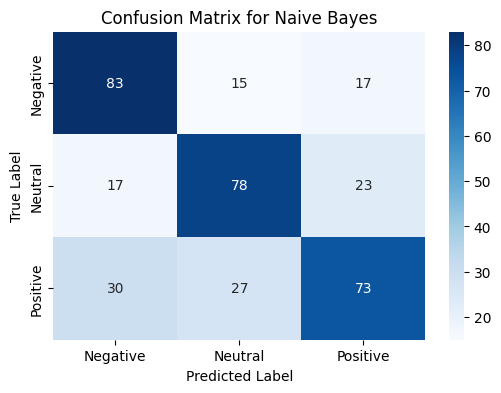

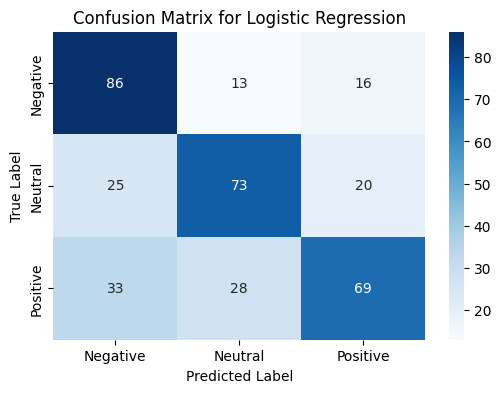

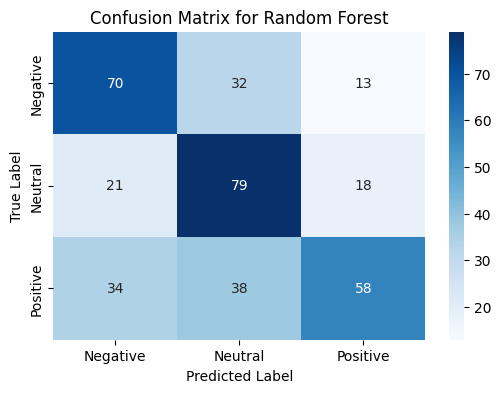

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Map string labels to integers for consistency
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
y_test_numeric = y_test.map(label_mapping)

# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Map predicted labels to integers for each model
y_pred_nb_numeric = pd.Series(y_pred_nb).map(label_mapping)
y_pred_lr_numeric = pd.Series(y_pred_lr).map(label_mapping)
y_pred_rf_numeric = pd.Series(y_pred_rf).map(label_mapping)


# Visualize confusion matrix for each model
plot_confusion_matrix(y_test_numeric, y_pred_nb_numeric, "Naive Bayes")
plot_confusion_matrix(y_test_numeric, y_pred_lr_numeric, "Logistic Regression")
plot_confusion_matrix(y_test_numeric, y_pred_rf_numeric, "Random Forest")


